## 0

In [155]:
import seaborn as sns
import numpy as np
import pandas as pd

df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [157]:
df[df["horsepower"].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [158]:
df.sort_values(by = "acceleration")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix
...,...,...,...,...,...,...,...,...,...
300,23.9,8,260.0,90.0,3420,22.2,79,usa,oldsmobile cutlass salon brougham
59,23.0,4,97.0,54.0,2254,23.5,72,europe,volkswagen type 3
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup


In [159]:
from sklearn.linear_model import LinearRegression

X_train, y_train = df[~df["horsepower"].isna()][["displacement", "acceleration"]], df[~df["horsepower"].isna()]["horsepower"]
X_pred = df[df["horsepower"].isna()][["displacement", "acceleration"]]

In [160]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_pred)

y_pred = np.round(y_pred)

y_pred

array([ 64., 100.,  68.,  95.,  78.,  73.])

In [161]:
df.loc[X_pred.index, "horsepower"] = y_pred

In [162]:
df.loc[X_pred.index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,64.0,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,100.0,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,68.0,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,95.0,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,78.0,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,73.0,3035,20.5,82,usa,amc concord dl


In [163]:
df = pd.get_dummies(df.drop("name", axis = 1), columns = ["origin"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [164]:
from sklearn.model_selection import train_test_split

X, y = df.drop(["mpg"], axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((318, 9), (40, 9), (40, 9), (318,), (40,), (40,))

In [165]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [215]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, LeakyReLU
from tensorflow.keras.optimizers import SGD

def MLP(depth = 3):
    model = Sequential(name = "mlp")
    model.add(InputLayer(X_train.shape[1], name = "input_layer"))
    for i in range(depth):
        model.add(Dense(16, name = f"hidden{i}", activation = "relu"))
    model.add(Dense(1, name = "output"))

    model.compile(loss = "mean_squared_error", optimizer = SGD(learning_rate = .001))
    return model

model = MLP(4)
model.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden0 (Dense)             (None, 16)                160       
                                                                 
 hidden1 (Dense)             (None, 16)                272       
                                                                 
 hidden2 (Dense)             (None, 16)                272       
                                                                 
 hidden3 (Dense)             (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [216]:
model.fit(scaled_X_train, y_train, epochs = 100, verbose = 1, validation_data = (scaled_X_val, y_val))

Epoch 1/100


2022-04-20 14:56:12.022244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 38ms/step - loss: 604.8352 - val_loss: 494.3626
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 517.0817

2022-04-20 14:56:12.582104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 80ms/step - loss: 531.1152 - val_loss: 310.0079
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 113.5852 - val_loss: 28.1257
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 23.2835 - val_loss: 13.9273
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 16.2305 - val_loss: 9.2450
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 12.9971 - val_loss: 8.3586
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 11.5861 - val_loss: 6.7004
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 10.3458 - val_loss: 7.0284
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 9.6881 - val_loss: 5.4257
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 9.2344 - val_loss: 5.1000
Epoch 11/100
10/10 [==============================] - 0s 6ms/step - loss: 9.7495 - val_loss: 4.2671
Epoch 

<AxesSubplot:>

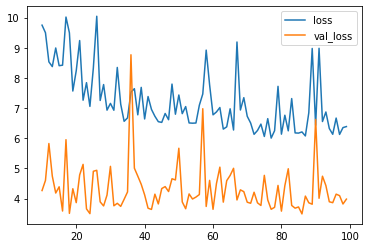

In [217]:
pd.DataFrame(model.history.history)[10:].plot()